# Algoritmo para encontrar Inliers

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Definir la funcion y graficar la distribucion

$$
f(x) = \frac{\sin(x)}{x} \cdot \cos(5x)
$$

/tmp/ipykernel_14322/900406405.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


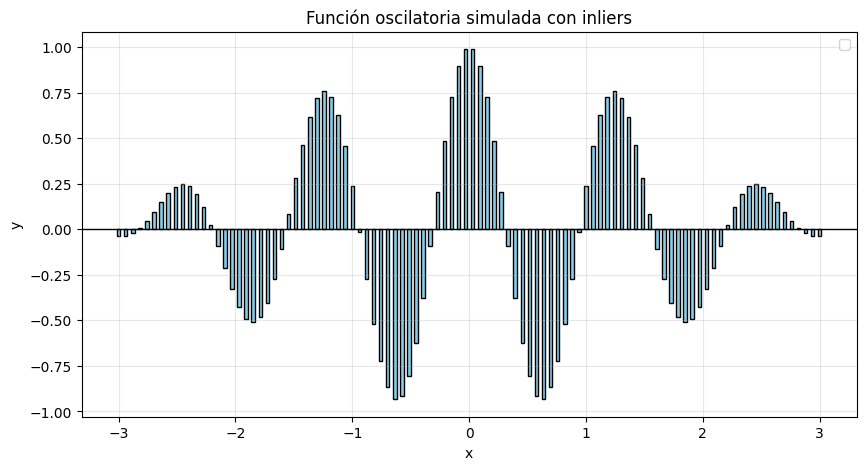

In [230]:
# Generar los datos
x = np.linspace(-3, 3, 100)  # eje x
y = np.cos(5 * x) * np.sin(x)/x  # función oscilatoria 

# Crear dataset en un DataFrame
df = pd.DataFrame({"x": x, "y": y})

# Graficar la función
plt.figure(figsize=(10, 5))
plt.bar(x, y, width=0.03, align="center", color="skyblue", edgecolor="black")
plt.title("Función oscilatoria simulada con inliers")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.axhline(0, color="black", linewidth=1)  # línea en y=0
plt.legend()
plt.show()

## Generar Inliers artificiales

In [231]:
df['y'].max(), df['y'].min()

(np.float64(0.9883922363593547), np.float64(-0.9331049457760087))

In [235]:
CANTIDAD_INLIERS = 5
indices_aletarios = []
cantidad = 0
while cantidad < CANTIDAD_INLIERS:
    aletorio = np.random.randint(0, 100)
    if aletorio not in indices_aletarios:
        indices_aletarios.append(aletorio)
        cantidad += 1
indices_aletarios, len(indices_aletarios)

([64, 62, 12, 96, 50], 5)

In [236]:
df_inliers = df.copy()
for i in indices_aletarios:
    #df_inliers.loc[i, 'x'] = -df_inliers['x'][i]
    print(f"indice {i} = {df_inliers['y'][i]} | ", end='')
    df_inliers['y'][i] = - df_inliers['y'][i]
    print(f"{df_inliers['y'][i]}")

indice 64 = -0.27432342835723145 | 0.27432342835723145
indice 62 = -0.7241248163259386 | 0.7241248163259386
indice 12 = 0.12088921792972172 | -0.12088921792972172
indice 96 = 0.005214572736967774 | -0.005214572736967774
indice 50 = 0.9883922363593547 | -0.9883922363593547


/tmp/ipykernel_14322/2211692888.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_inliers['y'][i] = - df_inliers['y'][i]


/tmp/ipykernel_14322/1535728082.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


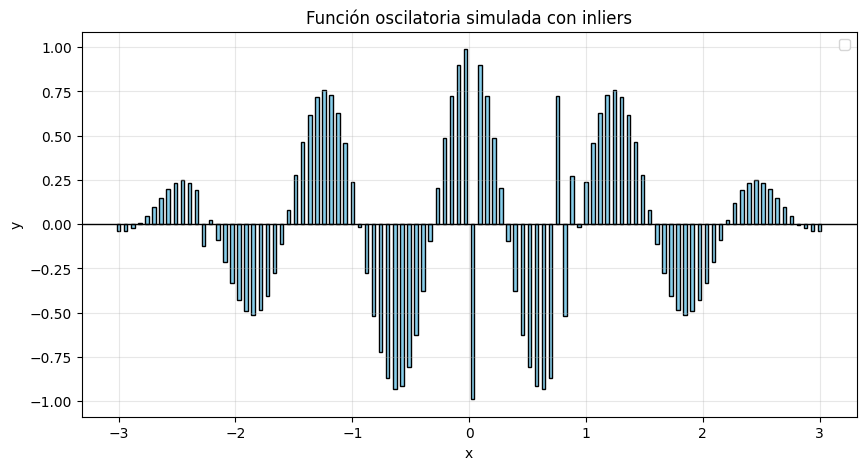

In [237]:
# Graficar la función
plt.figure(figsize=(10, 5))
plt.bar(df_inliers['x'], df_inliers['y'], width=0.03, align="center", color="skyblue", edgecolor="black")
plt.title("Función oscilatoria simulada con inliers")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.axhline(0, color="black", linewidth=1)  # línea en y=0
plt.legend()
plt.show()

In [252]:
list(df.iterrows())

[(0,
  x   -3.000000
  y   -0.035736
  Name: 0, dtype: float64),
 (1,
  x   -2.939394
  y   -0.036280
  Name: 1, dtype: float64),
 (2,
  x   -2.878788
  y   -0.022918
  Name: 2, dtype: float64),
 (3,
  x   -2.818182
  y    0.005215
  Name: 3, dtype: float64),
 (4,
  x   -2.757576
  y    0.046496
  Name: 4, dtype: float64),
 (5,
  x   -2.69697
  y    0.09681
  Name: 5, dtype: float64),
 (6,
  x   -2.636364
  y    0.149903
  Name: 6, dtype: float64),
 (7,
  x   -2.575758
  y    0.198066
  Name: 7, dtype: float64),
 (8,
  x   -2.515152
  y    0.233083
  Name: 8, dtype: float64),
 (9,
  x   -2.454545
  y    0.247340
  Name: 9, dtype: float64),
 (10,
  x   -2.393939
  y    0.234942
  Name: 10, dtype: float64),
 (11,
  x   -2.333333
  y    0.192705
  Name: 11, dtype: float64),
 (12,
  x   -2.272727
  y    0.120889
  Name: 12, dtype: float64),
 (13,
  x   -2.212121
  y    0.023540
  Name: 13, dtype: float64),
 (14,
  x   -2.151515
  y   -0.091614
  Name: 14, dtype: float64),
 (15,
  x   -2.09

In [263]:
#for fila, registro in df.iterrows():
indices_inliers = []
for i in range(len(df_inliers) - 2):
    #esInlier = False
    vecinoIzq = df_inliers['y'][i]
    centro = df_inliers['y'][i + 1]
    vecinoDer = df_inliers['y'][i + 2]
    print(vecinoIzq, centro, vecinoDer, end="")
    if vecinoIzq < vecinoDer:
        print(" a < b")
        if not (centro >= vecinoIzq and centro <= vecinoDer):
            #esInlier = True
            indices_inliers.append(i)
            continue
    elif vecinoIzq > vecinoDer:
        print(" a > b")
        if not (centro <= vecinoIzq and centro >= vecinoDer):
            #esInlier = True
            indices_inliers.append(i)
            continue


-0.035735721461873524 -0.03628000722474045 -0.02291808945743524 a < b
-0.03628000722474045 -0.02291808945743524 0.005214572736967774 a < b
-0.02291808945743524 0.005214572736967774 0.04649567970523826 a < b
0.005214572736967774 0.04649567970523826 0.09681029841806525 a < b
0.04649567970523826 0.09681029841806525 0.14990335053827172 a < b
0.09681029841806525 0.14990335053827172 0.19806566028504655 a < b
0.14990335053827172 0.19806566028504655 0.23308319293271523 a < b
0.19806566028504655 0.23308319293271523 0.24734035421021022 a < b
0.23308319293271523 0.24734035421021022 0.2349415978792598 a < b
0.24734035421021022 0.2349415978792598 0.192705025744311 a > b
0.2349415978792598 0.192705025744311 -0.12088921792972172 a > b
0.192705025744311 -0.12088921792972172 0.02354006945910983 a > b
-0.12088921792972172 0.02354006945910983 -0.0916144501263635 a < b
0.02354006945910983 -0.0916144501263635 -0.213741371277688 a > b
-0.0916144501263635 -0.213741371277688 -0.32991385761519176 a > b
-0.2137

In [259]:
indices_inliers

[0, 8, 11, 12, 18, 28, 38, 48, 49, 50, 59, 61, 62, 63, 64, 69, 79, 89, 97]